In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
puc_vendas = pd.read_parquet("data/puc_vendas.parquet")
print(f"Shape: {puc_vendas.shape}")
puc_vendas.head()

Shape: (9271036, 20)


,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,782344,55750557.0,Pessoa Física,F,1980-11-18,10085918,VONAU FLASH 4MG 10CP,MEDICAMENTOS,REFERENCIA,764,RS,80400,PORTO ALEGRE,2024-04-11 17:13:25,1.0,NaN,47.03,12.70,47.03,34.33
1,759507,55750557.0,Pessoa Física,F,1980-11-18,10106687,APTANUTRI PREMIUM 3,NUTRICAO,NUTRICAO LEITES,764,RS,80400,PORTO ALEGRE,2024-02-19 15:47:17,1.0,NaN,73.99,14.80,73.99,59.19
2,742082,55750557.0,Pessoa Física,F,1980-11-18,10037705,TORRADA ISABELA 142G TRADICIONAL,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-01-05 19:48:52,1.0,NaN,5.99,0.00,5.99,5.99
3,747733,55750557.0,Pessoa Física,F,1980-11-18,10004419,OZEMPIC 1MG 4AGULHAS NOVOFINE,MEDICAMENTOS,PBM ESPECIAL,764,RS,80400,PORTO ALEGRE,2024-01-20 14:41:56,1.0,NaN,1220.52,254.37,1220.52,966.15
4,748216,55750557.0,Pessoa Física,F,1980-11-18,10030435,NOVALGINA 1G 20CP OPELLA,MEDICAMENTOS,REFERENCIA ONEROSOS,764,RS,80400,PORTO ALEGRE,2024-01-22 16:48:36,1.0,100271131.0,41.51,5.52,41.51,35.99


In [3]:
puc_vendas.isnull().sum()

COD_CUPOM                          0
COD_CLIENTE                      178
CLIENTE_FISICO_JURIDICO        10051
SEXO_CLIENTE                  103541
DTNASCIMENTO_CLIENTE         1078012
COD_SKU                            0
SKU                                0
CATEGORIA_SKU                      0
SUBCATEGORIA_SKU                   0
COD_LOJA                           0
UF_CIDADE                          0
COD_CIDADE                         0
NOME_CIDADE                        0
DATA_CUPOM                         0
UNIDADES                           0
IDENTIFICADOR_PROMOCIONAL    6735816
PRECO_REGULAR                      0
TOTAL_DESCONTO                    73
TOTAL_BRUTO                        0
TOTAL_LIQUIDO                      0
dtype: int64

In [4]:
puc_vendas.nunique()

COD_CUPOM                     951832
COD_CLIENTE                   782986
CLIENTE_FISICO_JURIDICO            2
SEXO_CLIENTE                       2
DTNASCIMENTO_CLIENTE           31009
COD_SKU                        20658
SKU                            18151
CATEGORIA_SKU                      9
SUBCATEGORIA_SKU                  80
COD_LOJA                          94
UF_CIDADE                          1
COD_CIDADE                         1
NOME_CIDADE                        1
DATA_CUPOM                   3623409
UNIDADES                         154
IDENTIFICADOR_PROMOCIONAL      30250
PRECO_REGULAR                  10034
TOTAL_DESCONTO                 17905
TOTAL_BRUTO                    24389
TOTAL_LIQUIDO                  33664
dtype: int64

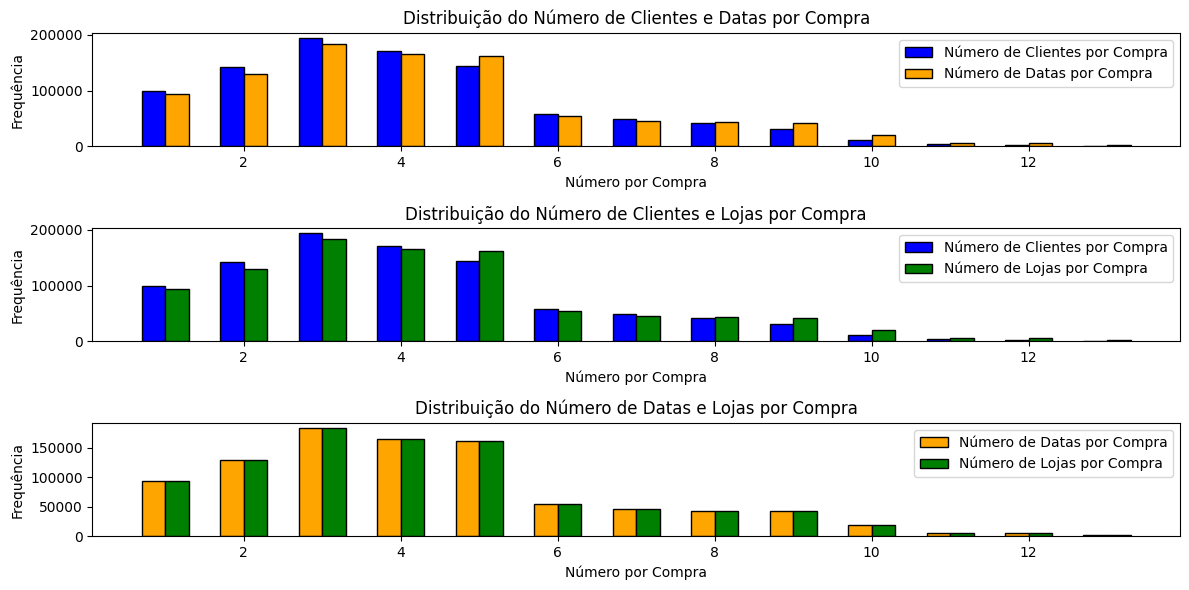

In [5]:
clientes_por_compra = puc_vendas.groupby('COD_CUPOM')['COD_CLIENTE'].nunique()
datas_por_compra = puc_vendas.groupby('COD_CUPOM')['DATA_CUPOM'].nunique()
lojas_por_compra = puc_vendas.groupby('COD_CUPOM')['COD_LOJA'].nunique()

bins = np.arange(1, max(clientes_por_compra.max(), datas_por_compra.max(), lojas_por_compra.max()) + 2)

freq_clientes, _ = np.histogram(clientes_por_compra, bins=bins)
freq_datas, _ = np.histogram(datas_por_compra, bins=bins)
freq_lojas, _ = np.histogram(lojas_por_compra, bins=bins)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
width = 0.3
plt.bar(bins[:-1] - width/2, freq_clientes, width=width, label='Número de Clientes por Compra', color='blue', edgecolor='black')
plt.bar(bins[:-1] + width/2, freq_datas, width=width, label='Número de Datas por Compra', color='orange', edgecolor='black')
plt.title('Distribuição do Número de Clientes e Datas por Compra')
plt.xlabel('Número por Compra')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(3, 1, 2)
plt.bar(bins[:-1] - width/2, freq_clientes, width=width, label='Número de Clientes por Compra', color='blue', edgecolor='black')
plt.bar(bins[:-1] + width/2, freq_lojas, width=width, label='Número de Lojas por Compra', color='green', edgecolor='black')
plt.title('Distribuição do Número de Clientes e Lojas por Compra')
plt.xlabel('Número por Compra')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(3, 1, 3)
plt.bar(bins[:-1] - width/2, freq_datas, width=width, label='Número de Datas por Compra', color='orange', edgecolor='black')
plt.bar(bins[:-1] + width/2, freq_lojas, width=width, label='Número de Lojas por Compra', color='green', edgecolor='black')
plt.title('Distribuição do Número de Datas e Lojas por Compra')
plt.xlabel('Número por Compra')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

Os gráficos apresentados revelam que há compras onde o número de clientes, datas e lojas associadas não são consistentes entre si. Por exemplo, algumas compras possuem mais de um cliente, mas o número de clientes não corresponde ao número de datas ou ao número de lojas. Isso sugere que múltiplas transações ou registros estão sendo agregados sob o mesmo código de compra (COD_CUPOM), mas com variações significativas nos atributos associados (clientes, datas e lojas). Esse desalinhamento pode indicar problemas de integridade dos dados, como erros na forma de registro das transações ou inconsistências na maneira como os dados foram agregados. Se esses dados forem utilizados para análises, como avaliar o comportamento do consumidor ou a eficiência de vendas em diferentes lojas, essas inconsistências podem levar a conclusões imprecisas ou enganosas, comprometendo a qualidade das decisões baseadas nesses dados. Portanto, é essencial investigar e corrigir essas discrepâncias para garantir a precisão e a confiabilidade das análises subsequentes.

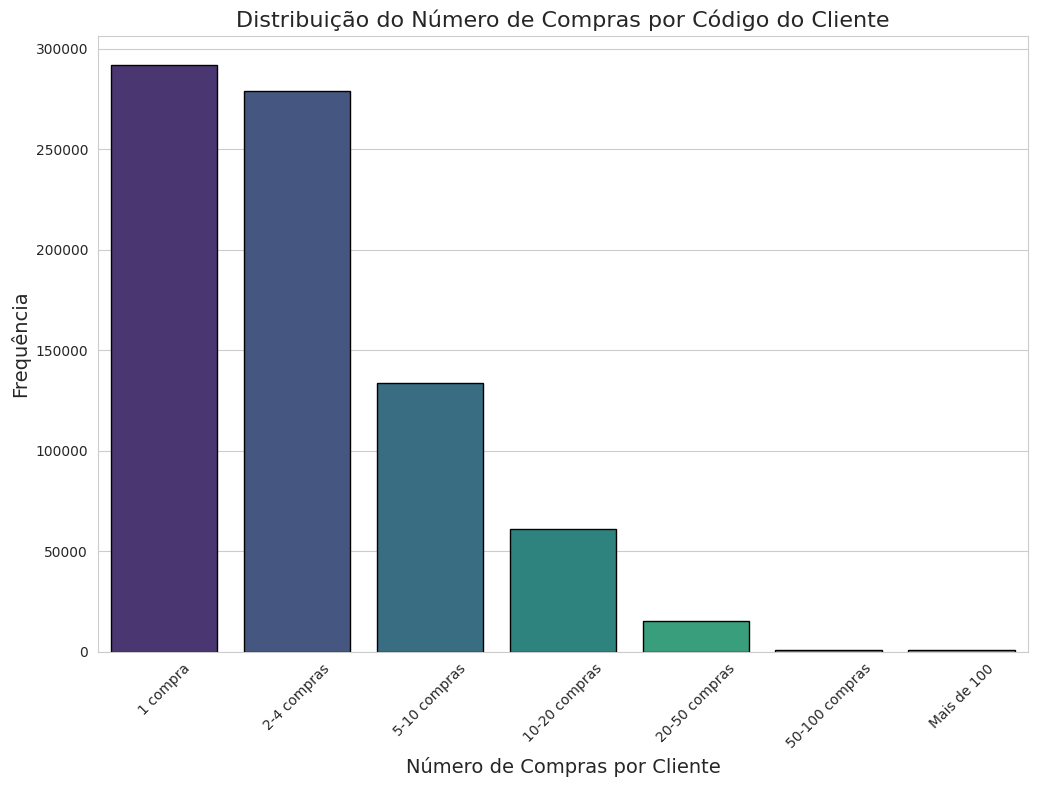

In [6]:
compras_por_cliente = puc_vendas.groupby('COD_CLIENTE')['COD_CUPOM'].nunique()

bins = [1, 2, 5, 10, 20, 50, 100, compras_por_cliente.max() + 1]
labels = ['1 compra', '2-4 compras', '5-10 compras', '10-20 compras', '20-50 compras', '50-100 compras', 'Mais de 100']

compras_por_cliente_binned = pd.cut(compras_por_cliente, bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.countplot(x=compras_por_cliente_binned, hue=compras_por_cliente_binned, palette="viridis", edgecolor='black', legend=False)

plt.title('Distribuição do Número de Compras por Código do Cliente', fontsize=16)
plt.xlabel('Número de Compras por Cliente', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [7]:
puc_vendas.groupby('COD_CLIENTE')['COD_CUPOM'].nunique().agg(['min', 'mean', 'median', 'max'])

min            1.000000
mean           4.971531
median         2.000000
max       484719.000000
Name: COD_CUPOM, dtype: float64

Maioria dos clientes tem somente uma unica compra. Tem um maluco com 484719 compras????

In [8]:
puc_vendas[["COD_CLIENTE", "SEXO_CLIENTE"]].drop_duplicates()["SEXO_CLIENTE"].value_counts()

SEXO_CLIENTE
M    400688
F    364183
Name: count, dtype: int64

Homens e mulheres quase igualmente distribuidos.

In [9]:
print(f"Temos {puc_vendas[puc_vendas["CLIENTE_FISICO_JURIDICO"]=="Pessoa Jurídica"]["COD_CLIENTE"].nunique()} clientes Pessoa Jurídica")
print(f"Temos {puc_vendas[puc_vendas["CLIENTE_FISICO_JURIDICO"]=="Pessoa Física"]["COD_CLIENTE"].nunique()} clientes Pessoa Física")

Temos 771 clientes Pessoa Jurídica
Temos 778335 clientes Pessoa Física


In [10]:
puc_vendas["COD_CLIENTE"].nunique()

782986

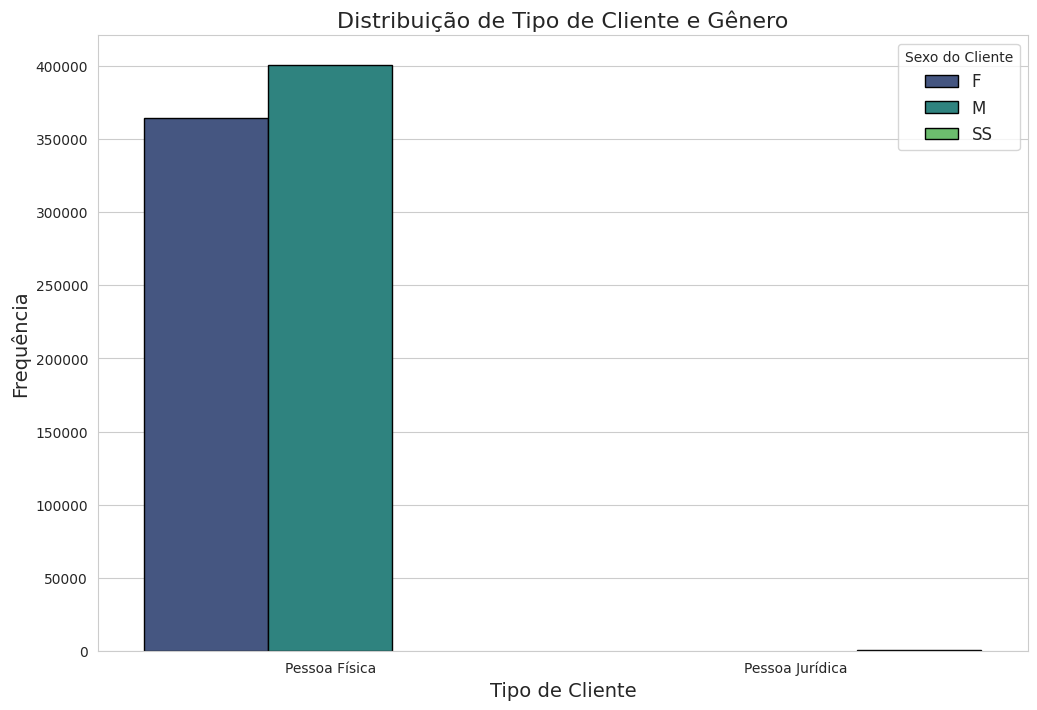

In [11]:
clientes_data = puc_vendas[["COD_CLIENTE", "CLIENTE_FISICO_JURIDICO", "SEXO_CLIENTE"]].drop_duplicates()
clientes_data.loc[clientes_data["CLIENTE_FISICO_JURIDICO"] == "Pessoa Jurídica", "SEXO_CLIENTE"] = "SS"

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.countplot(x='CLIENTE_FISICO_JURIDICO', hue='SEXO_CLIENTE', data=clientes_data, palette='viridis', edgecolor='black')

plt.title('Distribuição de Tipo de Cliente e Gênero', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(title='Sexo do Cliente', fontsize=12)

plt.show()

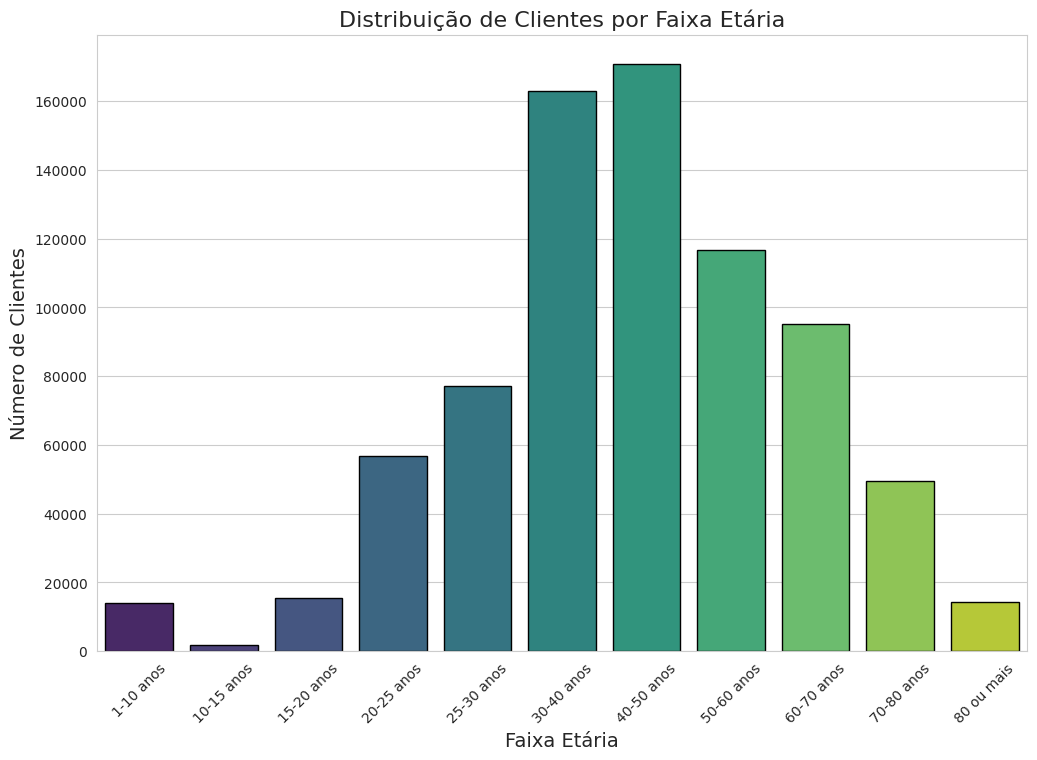

In [12]:
clientes_data = puc_vendas[['COD_CLIENTE', 'DTNASCIMENTO_CLIENTE']].drop_duplicates()
clientes_data['DTNASCIMENTO_CLIENTE'] = pd.to_datetime(clientes_data['DTNASCIMENTO_CLIENTE'], errors='coerce')
clientes_data['IDADE'] = (pd.to_datetime('today') - clientes_data['DTNASCIMENTO_CLIENTE']).dt.days // 365

bins = [1, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100]
labels = ['1-10 anos', '10-15 anos', '15-20 anos', '20-25 anos', '25-30 anos', '30-40 anos', 
          '40-50 anos', '50-60 anos', '60-70 anos', '70-80 anos', '80 ou mais']

clientes_data['Faixa_Etaria'] = pd.cut(clientes_data['IDADE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.countplot(x='Faixa_Etaria', hue='Faixa_Etaria', data=clientes_data, palette='viridis', edgecolor='black', legend=False)

plt.title('Distribuição de Clientes por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45)

plt.show()

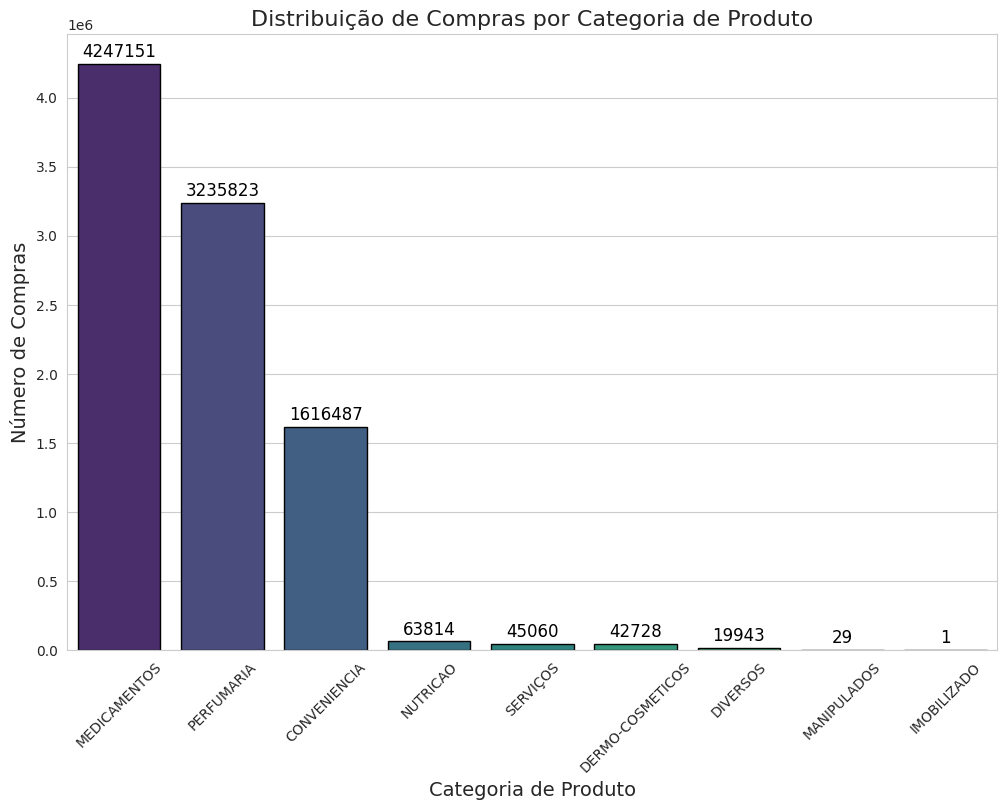

In [24]:
sorted_counts = puc_vendas['CATEGORIA_SKU'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, edgecolor='black', hue=sorted_counts.index, palette='viridis', legend=False)
plt.title('Distribuição de Compras por Categoria de Produto', fontsize=16)
plt.xlabel('Categoria de Produto', fontsize=14)
plt.ylabel('Número de Compras', fontsize=14)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')


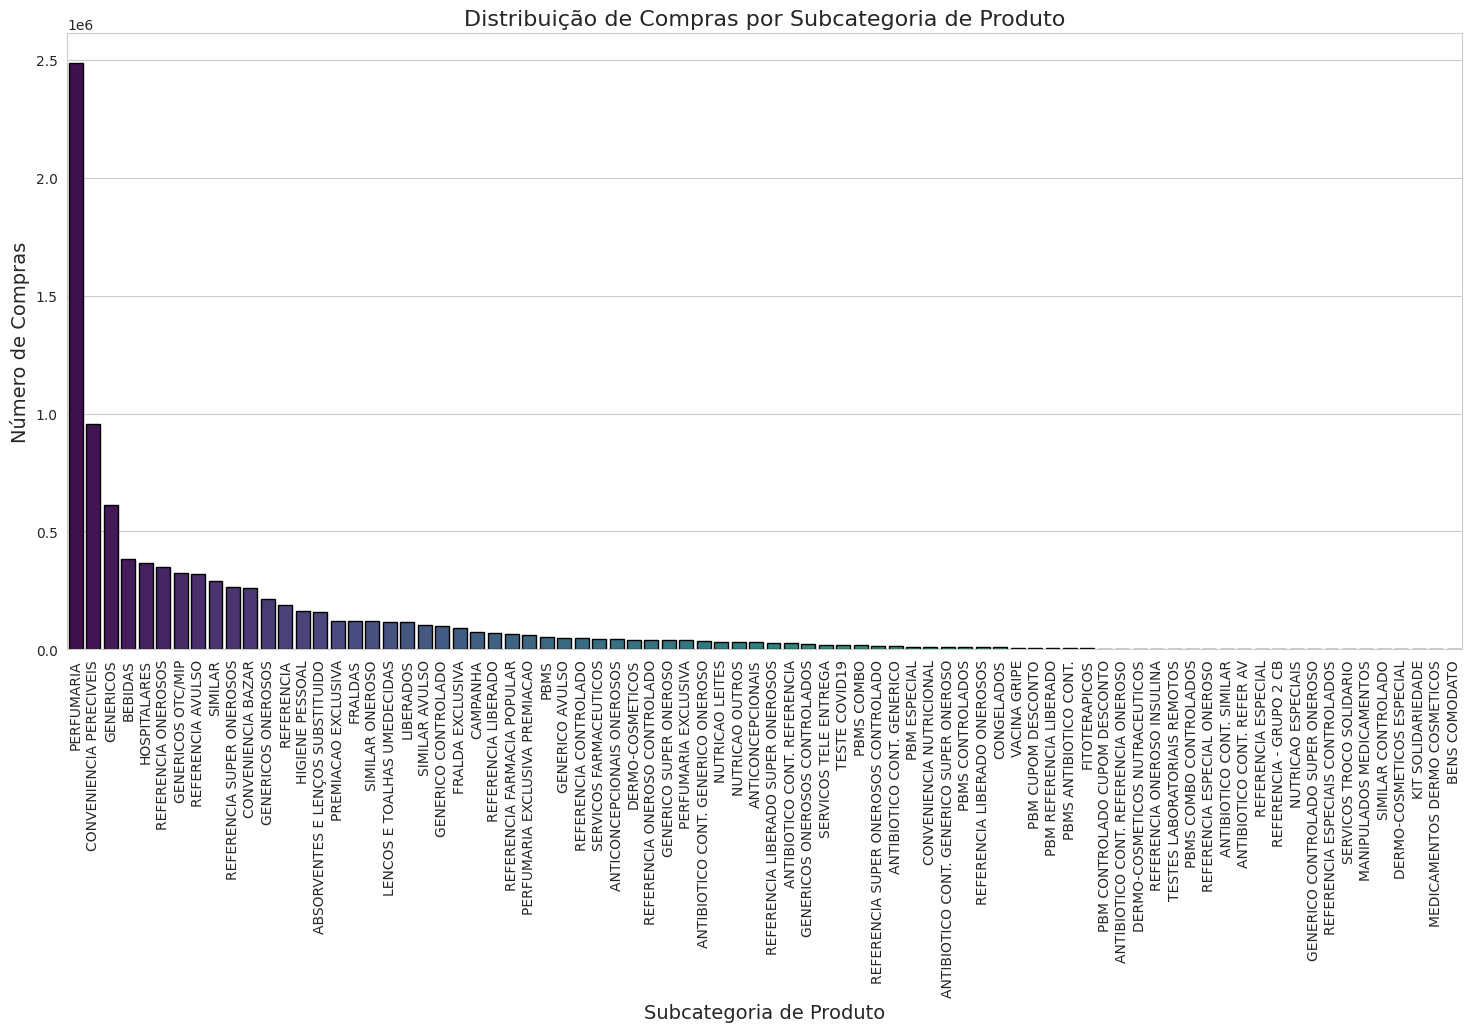

In [23]:
sorted_counts = puc_vendas["SUBCATEGORIA_SKU"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, edgecolor='black', hue=sorted_counts.index, palette='viridis', legend=False)
plt.title('Distribuição de Compras por Subcategoria de Produto', fontsize=16)
plt.xlabel('Subcategoria de Produto', fontsize=14)
plt.ylabel('Número de Compras', fontsize=14)
plt.xticks(rotation=90)
plt.show()